In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle

# ================================
# INICIALIZAÇÃO DE VARIÁVEIS
# ================================
ordem = [
    'App11', 'App4', 'App6', 'App19', 'App12', 'App15', 'App16', 'App18',
    'App7', 'App8', 'App13', 'App9', 'App10', 'App17', 'App2', 'App0',
    'App3', 'App5', 'App1', 'App14'
]

numbers = [6, 7, 8, 12, 15, 15, 16, 17, 18, 21, 22, 23, 23, 23, 24, 25, 26, 26, 28, 29]

result = 'h'  # 'm' para modelos ou 'h' para heurísticas
dict_lines = {}
topology = 'synthetic' # 'germany'

if result == 'h':  # Heurísticas
    names = ['Heurística H-1', 'Heurística H-2', 'Heurística H-3']
    # names = ['Heuristic H-1', 'Heuristic H-2', 'Heuristic H-3']
    dict_lines[names[0]] = pd.read_pickle('../results/times/h1_min_nodes_alloc_'+topology+'_time.pkl')
    dict_lines[names[1]] = pd.read_pickle('../results/times/h2_min_residual_'+topology+'_time.pkl')
    dict_lines[names[2]] = pd.read_pickle('../results/times/h3_min_hops_'+topology+'_time.pkl')
else:
    names = ['Modelo M-1', 'Modelo M-2', 'Modelo M-3']
    # names = ['Model M-1', 'Model M-2', 'Model M-3']
    dict_lines[names[0]] = pd.read_pickle('../results/times/m1_min_nodes_alloc_'+topology+'_time.pkl')
    dict_lines[names[1]] = pd.read_pickle('../results/times/m2_min_residual_'+topology+'_time.pkl')

    dict_lines[names[2]] = pd.read_pickle('../results/times/m3_min_hops_'+topology+'_30min_time.pkl')

In [8]:
if topology == 'synthetic':
    # Criar DataFrame com os nomes das aplicações
    df = pd.DataFrame({'App': [f"App{i}" for i in range(20)]})

    # Adicionar os valores correspondentes de cada modelo ao DataFrame
    for name in names:
        df[name] = df['App'].map(lambda app: float(dict_lines[name][app][0]))

    # Criar uma coluna 'Number of Services' com valores de 4 a 80 (de 4 em 4)
    df['Number of Services'] = np.arange(4, 84, 4)

else:
    # Reordenar os dados conforme a ordem definida
    for name in names:
        dict_lines[name] = {app: dict_lines[name][app] for app in ordem}

    # Criar DataFrame com a ordem correta das aplicações
    df = pd.DataFrame({'App': ordem})

    # Adicionar os valores de cada modelo ao DataFrame convertidos para float
    for name in names:
        df[name] = df['App'].map(lambda app: float(dict_lines[name][app][0]))

    # Adicionar a coluna 'Number of Services' com os valores da variável 'numbers'
    df['Number of Services'] = numbers

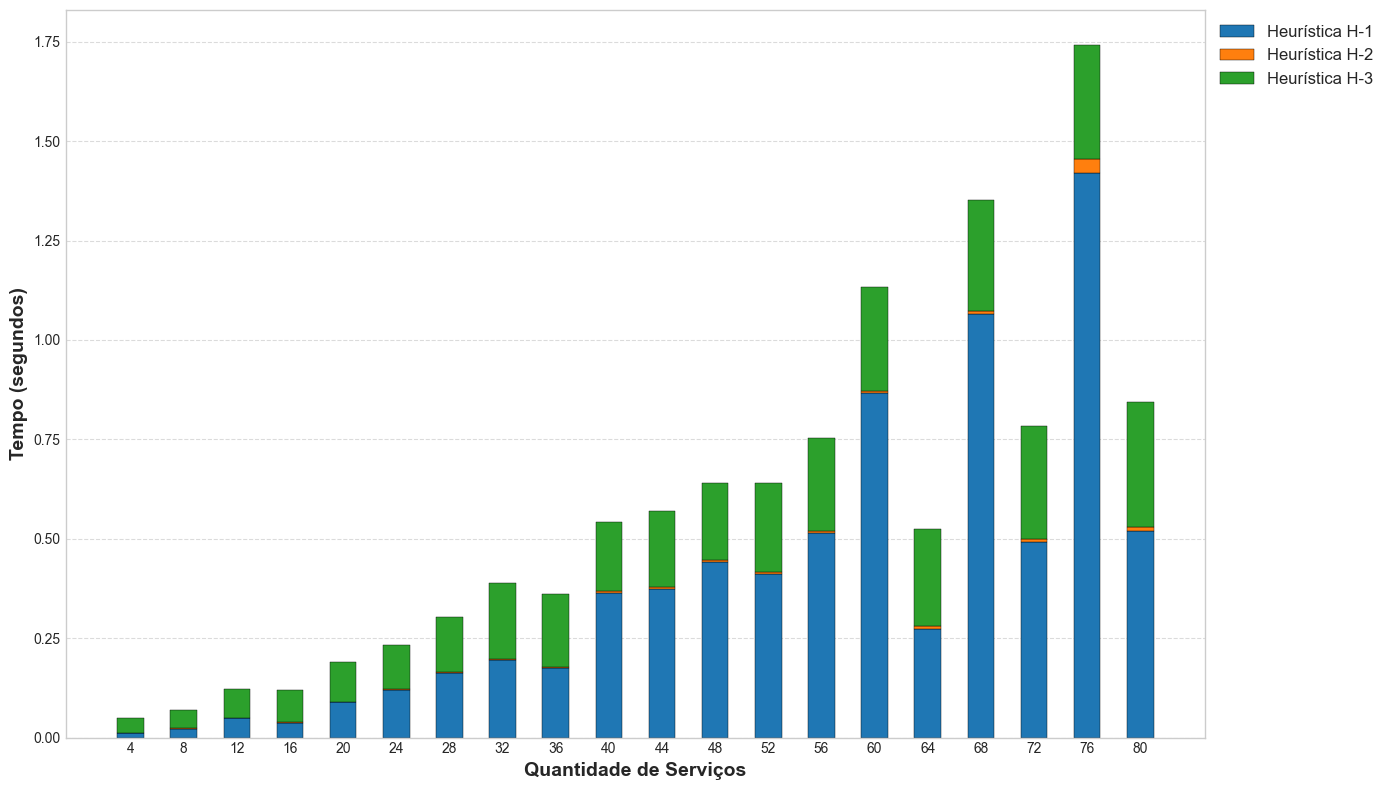

2025-04-16 23:46:40


In [9]:
# ================================
# PLOTAGEM DO GRÁFICO
# ================================
def plot_stacked_bar_chart_with_text(dataframe, title, xlabel, ylabel, text_description):
    """
    Plota um gráfico de barras empilhadas com texto explicativo.
    """
    plt.style.use('seaborn-v0_8-whitegrid')

    # Extração de dados
    labels = dataframe['Number of Services']
    data = dataframe.iloc[:, 1:-1]

    bar_width = 0.5
    positions = np.arange(len(labels))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(14, 8))
    bottom = [0] * len(labels)

    for i, col in enumerate(data.columns):
        ax.bar(
            positions, data[col], bar_width,
            bottom=bottom, label=col, color=colors[i % len(colors)],
            edgecolor='black', linewidth=0.3
        )
        bottom = [sum(x) for x in zip(bottom, data[col])]

    # Configurações do gráfico
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', linestyle="--", alpha=0.7)

    # Adicionar texto explicativo
    fig.text(0.1, -0.1, text_description, fontsize=12, wrap=True, ha='left', va='top')
    plt.tight_layout()

    plt.grid(False)
    plt.grid(axis='y', linestyle="--", alpha=0.7)

    # Salvar gráfico em arquivo svg
    plt.savefig(f"plots/heuts_solution_time_decision_{topology.replace('_new', '')}.svg", format='svg', dpi=1200)
    plt.show()

# Exemplo de plotagem
plot_stacked_bar_chart_with_text(
    df, '', 'Quantidade de Serviços', 'Tempo (segundos)',
    ''
)

# Exibir data e hora atual
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

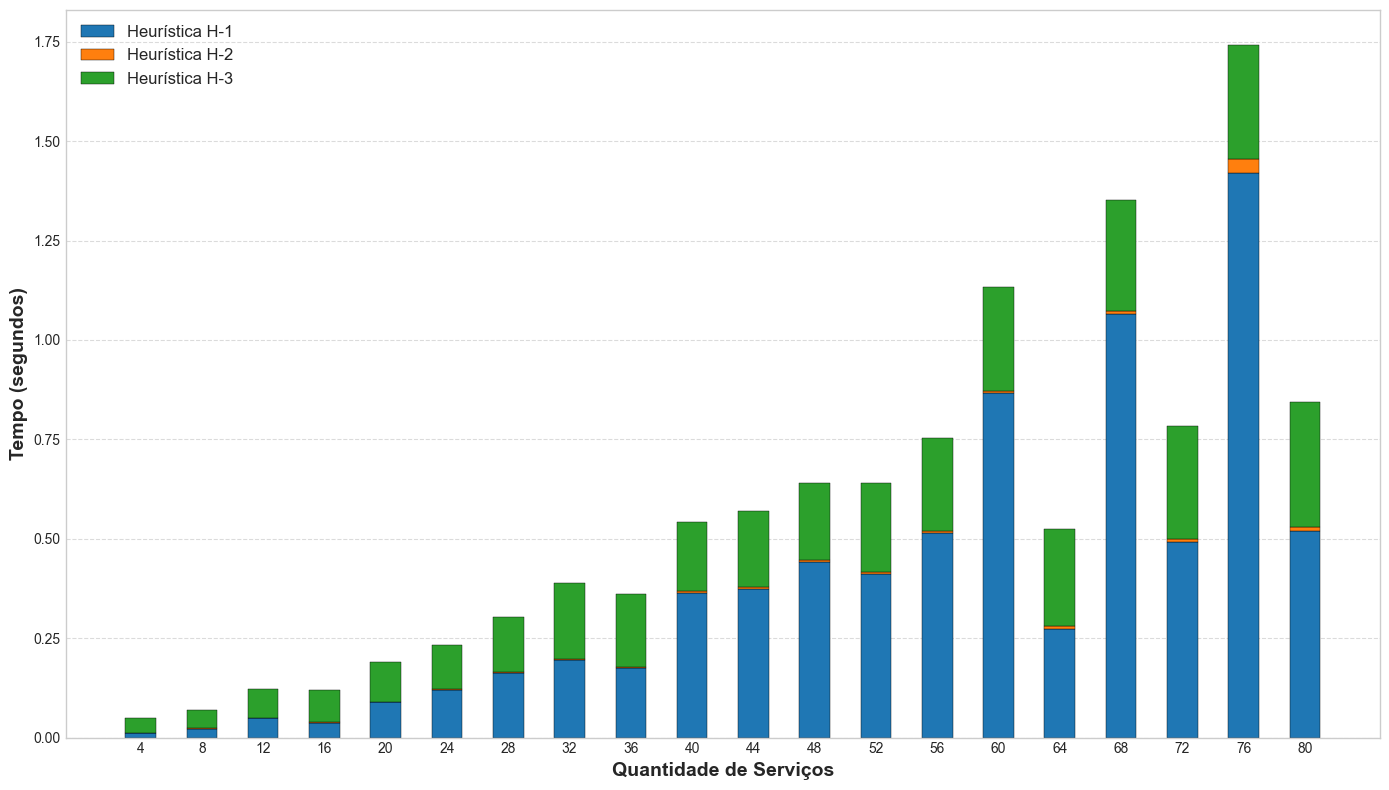

In [10]:
def plot_stacked_bar_chart_with_text(dataframe, title, xlabel, ylabel, text_description):
    """
    Plota um gráfico de barras empilhadas com texto explicativo.
    """
    plt.style.use('seaborn-v0_8-whitegrid')

    # Extração de dados
    labels = dataframe['Number of Services']
    data = dataframe.iloc[:, 1:-1]

    bar_width = 0.5
    positions = np.arange(len(labels))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    # Criar gráfico
    fig, ax = plt.subplots(figsize=(14, 8))
    bottom = [0] * len(labels)

    for i, col in enumerate(data.columns):
        ax.bar(
            positions, data[col], bar_width,
            bottom=bottom, label=col, color=colors[i % len(colors)],
            edgecolor='black', linewidth=0.3
        )
        bottom = [sum(x) for x in zip(bottom, data[col])]

    # Configurações do gráfico
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    ax.legend(fontsize=12, loc='upper left')
    ax.grid(axis='y', linestyle="--", alpha=0.7)

    # Adicionar texto explicativo
    fig.text(0.1, -0.1, text_description, fontsize=12, wrap=True, ha='left', va='top')
    plt.tight_layout()

    plt.grid(False)
    plt.grid(axis='y', linestyle="--", alpha=0.7)

    # Salvar gráfico em arquivo svg
    plt.savefig(f"plots/heuts_solution_time_decision_{topology.replace('_new', '')}.svg", format='svg', dpi=1200)
    plt.show()

# # Exemplo de plotagem
# plot_stacked_bar_chart_with_text(
#     df, '', 'Number of Services', 'Time (seconds)',
#     ''
# )

# Exemplo de plotagem
plot_stacked_bar_chart_with_text(
    df, '', 'Quantidade de Serviços', 'Tempo (segundos)',
    ''
)

In [11]:
df['Heurística H-1']

# exibir média de df['Heurística H-1']
print(df['Heurística H-1'].mean())

0.38002733


In [12]:

print(df['Heurística H-2'].mean())


print(df['Heurística H-3'].mean())

0.0059146395
0.181821276
